### 使用最小二乘法拟和曲线

高斯于1823年在误差$e_1,…,e_n$独立同分布的假定下,证明了最小二乘方法的一个最优性质: 在所有无偏的线性估计类中,最小二乘方法是其中方差最小的！
对于数据$(x_i, y_i)   (i=1, 2, 3...,m)$

拟合出函数$h(x)$

有误差，即残差：$r_i=h(x_i)-y_i$

此时$L2$范数(残差平方和)最小时，$h(x)$ 和 $y$ 相似度最高，更拟合

一般的$H(x)$为$n$次的多项式，$H(x)=w_0+w_1x+w_2x^2+...w_nx^n$

$w(w_0,w_1,w_2,...,w_n)$为参数

最小二乘法就是要找到一组 $w(w_0,w_1,w_2,...,w_n)$ ，使得$\sum_{i=1}^n(h(x_i)-y_i)^2$ (残差平方和) 最小

即，求 $min\sum_{i=1}^n(h(x_i)-y_i)^2$

----

In [311]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

* 函数调用说明 numpy.poly1d([1,2,3])  生成  $1x^2+2x^1+3x^0$*

In [312]:
# 目标函数𝑦=𝑠𝑖𝑛2𝜋𝑥——在几个频率值下测试：1,2,3,9
def real_func(x):
    #return np.sin(2*np.pi*x)
    #return np.sin(2*2*np.pi*x)
    #return np.sin(4*2*np.pi*x)
    return np.sin(8*2*np.pi*x)

# 多项式
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

# 残差
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [313]:
# 调整数据点数，进行测试
#x = np.linspace(0, 1, 10)
#x = np.linspace(0, 1, 100)
x = np.linspace(0, 1, 200)

x_points = np.linspace(0, 1, 1000)
# 加上正态分布噪音的目标函数的值——在几个噪声方差上进行测试
y_ = real_func(x)
#y = [np.random.normal(0, 0.1) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.2) + y1 for y1 in y_]
#y = [np.random.normal(0, 0.3) + y1 for y1 in y_]
y = [np.random.normal(0, 0.5) + y1 for y1 in y_]



def fitting(M=0):
    """
    M    为 多项式的次数
    """
    # 随机初始化多项式参数
    p_init = np.random.rand(M + 1)
    # 最小二乘法
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # 可视化
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

### M=10

Fitting Parameters: [ 3.17030645e+04 -1.39843531e+05  2.52983022e+05 -2.39767570e+05
  1.25021147e+05 -3.35162118e+04  3.30828695e+03  7.75203338e+01
  5.28245825e+01 -1.99747801e+01  1.21220143e+00]


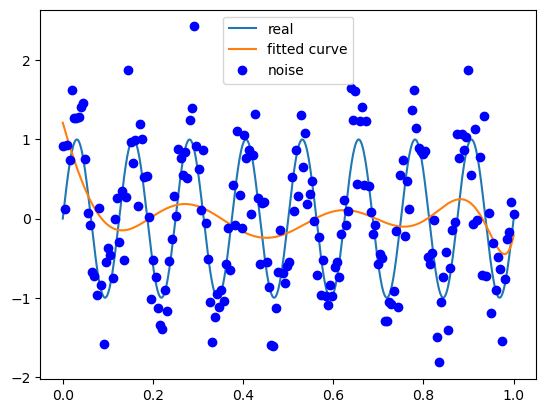

In [314]:
# M=10
p_lsq_0 = fitting(M=10)

### M=30

Fitting Parameters: [-5.08669755e+04 -6.50270695e+05  1.07526656e+06  3.40657852e+05
 -1.76153730e+05 -4.90773878e+05 -6.68745800e+05  6.80243674e+05
 -1.10026452e+06  5.19173288e+05  3.33197110e+05  1.56010459e+06
 -5.60740926e+05 -4.54164201e+05 -6.21254704e+05 -8.28606133e+05
  4.59024744e+05  7.63802203e+05  5.37912177e+05 -3.55368503e+04
 -7.08640149e+05 -8.08783154e+05  8.33283981e+05  9.56200022e+05
 -1.56360274e+06  8.75022480e+05 -2.51209090e+05  3.85085385e+04
 -2.85346490e+03  6.89448197e+01  6.32962617e-01]


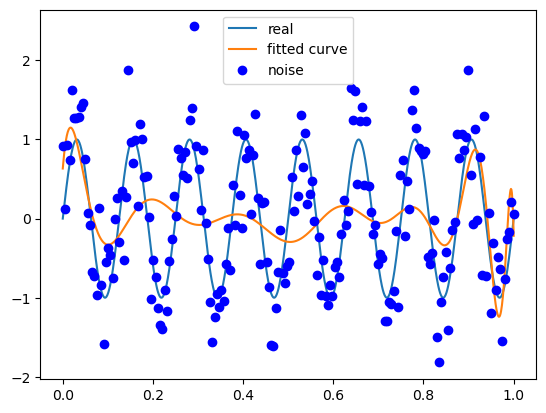

In [315]:
# M=30
p_lsq_1 = fitting(M=30)

### M=50

Fitting Parameters: [-1.73829725e+05 -2.13000030e+05  4.76386395e+05  3.32457087e+05
  3.12246922e+05 -1.57113380e+05 -6.01544766e+05 -1.47586575e+05
 -2.19367304e+05 -5.42869372e+05  1.07914494e+05  3.29099798e+05
  2.98586466e+05  2.06132936e+05  4.58230694e+05  2.80385107e+05
  2.70277349e+05 -2.98090698e+01 -4.79530845e+05 -4.11848633e+05
 -6.31025016e+05 -4.83376272e+05  2.77771520e+04  3.67445826e+05
  1.70656388e+05  3.77279116e+05  3.71435364e+05  2.44160155e+05
 -2.10743574e+04  4.62012807e+04 -2.93777689e+05 -3.82357916e+05
 -3.17214419e+05 -2.27342114e+05  2.11986333e+05  3.93506886e+05
  4.36923326e+05 -1.52829359e+05 -5.07241935e+04 -2.64936294e+05
 -2.38896969e+05  1.10167864e+05  3.65977864e+05  2.99057416e+04
 -4.77903928e+05  3.69714523e+05 -1.26797820e+05  2.17993075e+04
 -1.71517358e+03  3.70718552e+01  8.26630680e-01]


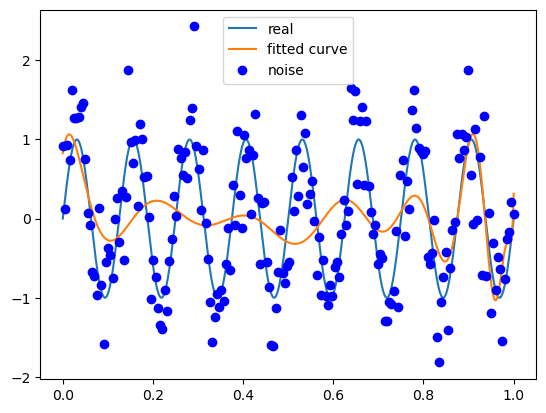

In [316]:
# M=50
p_lsq_3 = fitting(M=50)

### M=180

Fitting Parameters: [ 7.98280564e+03  1.07141875e+04  6.04310688e+03 -1.96417580e+03
  2.26914270e+03  5.91879668e+03  2.51123446e+03 -7.39159390e+03
 -1.54799606e+04 -1.01208764e+04 -1.29333629e+04 -1.24616758e+04
 -2.73238238e+04 -8.87025088e+03 -8.87386972e+03 -5.60240425e+02
  8.23140320e-02 -7.45760748e+02  3.73026850e+03  1.92586163e+03
  4.87985745e+03  5.77778912e+03  7.77471161e+03  1.15042661e+04
  1.12742952e+04  1.36550313e+04  1.11877734e+04  1.35150289e+04
  4.06428448e+03  1.11089672e+04 -1.95493721e+04  1.12894419e+04
  1.72900527e+04  8.30102186e+03 -2.01347545e+02  1.14001694e+04
  1.18692203e+04 -8.05984051e+03  6.47112094e+03  4.27644762e+03
  1.05919607e+04  1.54320150e+04 -2.01619962e+04  1.35877463e+03
 -7.09164606e+02  3.27720364e+03 -4.48628612e+03 -1.66769778e+03
 -1.64819591e+03 -5.83779996e+03 -6.77774237e+03 -8.70557732e+03
 -6.01412594e+03 -9.50703680e+03 -8.38299213e+03 -1.03754181e+04
 -6.22126868e+03 -1.17438102e+04 -9.76171873e+03 -1.42903667e+04
 -1.3

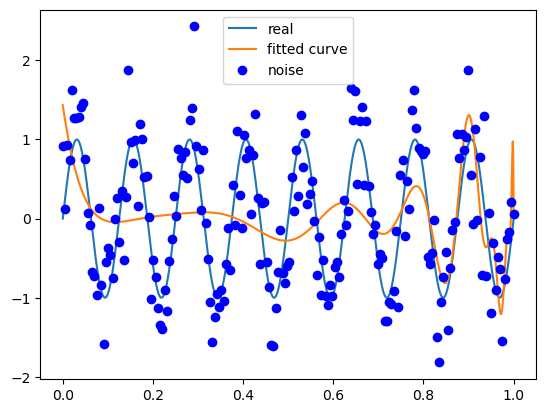

In [317]:
# M=180
p_lsq_9 = fitting(M=180)

### 正则化

结果显示过拟合， 引入正则化项(regularizer)，降低过拟合

$Q(x)=\sum_{i=1}^n(h(x_i)-y_i)^2+\lambda||w||^2$。

回归问题中，损失函数是平方损失，正则化可以是参数向量的L2范数,也可以是L1范数。

- L1: regularization\*abs(p)

- L2: 0.5 \* regularization \* np.square(p)

In [318]:
regularization = 0.0001


def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret,
                    np.sqrt(0.5 * regularization * np.square(p)))  # L2范数作为正则化项
    return ret

In [319]:
# 最小二乘法,加正则化项
p_init = np.random.rand(9 + 1)
p_lsq_regularization = leastsq(
    residuals_func_regularization, p_init, args=(x, y))

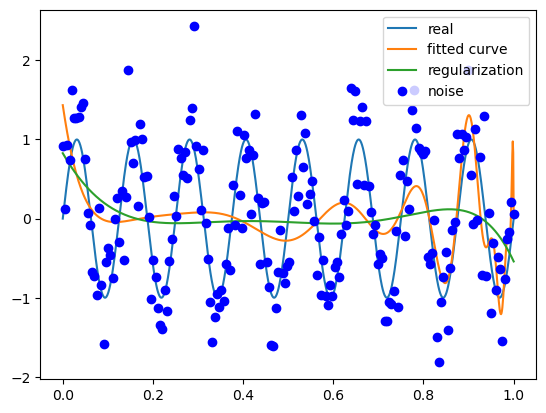

In [320]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(
    x_points,
    fit_func(p_lsq_regularization[0], x_points),
    label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()